### [The data block API](https://docs.fast.ai/data_block.html#The-data-block-API)

The data block API lets you customize the creation of a DataBunch by isolating the underlying parts of that process in separate blocks, mainly:

1. Where are the inputs and how to create them? (`.from_folder()`)
1. How to split the data into a training and validation sets? (`.split_by_folder()`)
1. How to label the inputs? (`.label_from_folder()`)
1. What transforms to apply? (`.transform(tfms, size=64)`)
1. How to add a test set? (optional; `.add_test_folder()`)
1. How to wrap in dataloaders and create the DataBunch? (`.databunch()`)

In [1]:
from fastai.vision import *

In [2]:
planet = untar_data(URLs.PLANET_SAMPLE)

In [3]:
planet

PosixPath('/home/paperspace/.fastai/data/planet_sample')

In [5]:
ImageItemList.from_csv
ImageItemList.from_df
ImageItemList.from_folder # returns ItemList

<bound method ImageItemList.from_folder of <class 'fastai.vision.data.ImageItemList'>>

In [6]:
ItemList?

# A collection of items with `length` and indexing properties

In [7]:
a = ImageItemList.from_folder(planet)
a

ImageItemList (1000 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: /home/paperspace/.fastai/data/planet_sample

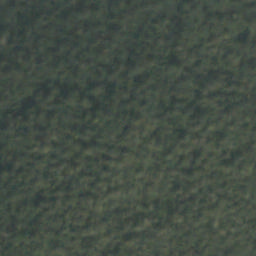

In [8]:
# An ItemList object lets you index its content
a[0]

In [25]:
a.items

array([PosixPath('/home/paperspace/.fastai/data/planet_sample/train/train_20599.jpg'),
       PosixPath('/home/paperspace/.fastai/data/planet_sample/train/train_15018.jpg'),
       PosixPath('/home/paperspace/.fastai/data/planet_sample/train/train_35475.jpg'),
       PosixPath('/home/paperspace/.fastai/data/planet_sample/train/train_9663.jpg'), ...,
       PosixPath('/home/paperspace/.fastai/data/planet_sample/train/train_2407.jpg'),
       PosixPath('/home/paperspace/.fastai/data/planet_sample/train/train_6562.jpg'),
       PosixPath('/home/paperspace/.fastai/data/planet_sample/train/train_12839.jpg'),
       PosixPath('/home/paperspace/.fastai/data/planet_sample/train/train_11505.jpg')], dtype=object)

In [17]:
a.path

PosixPath('/home/paperspace/.fastai/data/planet_sample')

In [10]:
# content property: sizes
a.sizes

{0: torch.Size([256, 256]),
 1: torch.Size([256, 256]),
 2: torch.Size([256, 256]),
 3: torch.Size([256, 256]),
 4: torch.Size([256, 256])}

It wouldn't make sense to write `ImageDataBunch` from scratch. I wonder if the data block API is somehow related to `DataBunch` class?

In [34]:
ImageDataBunch.from_folder??


**Signature**

```python
ImageDataBunch.from_folder(
    ['path: Union[pathlib.Path, str]', "train: Union[pathlib.Path, str] = 'train'", "valid: Union[pathlib.Path, str] = 'valid'", 'valid_pct=None', 'classes: Collection = None', '**kwargs: Any'],
) -> 'ImageDataBunch'
```

**Source**

```python
@classmethod
def from_folder(cls, path:PathOrStr, train:PathOrStr='train', valid:PathOrStr='valid',
                valid_pct=None, classes:Collection=None, **kwargs:Any)->'ImageDataBunch':
    "Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`)."
    path=Path(path)
    il = ImageItemList.from_folder(path)
    if valid_pct is None: src = il.split_by_folder(train=train, valid=valid)
    else: src = il.random_split_by_pct(valid_pct)
    src = src.label_from_folder(classes=classes)
    return cls.create_from_ll(src, **kwargs)
```

**File**
```
~/anaconda3/envs/fastai-v3/lib/python3.7/site-packages/fastai/vision/data.py
```



Answer: yup, DataBunch classes are built with data block API.